In [1]:
import os
fidir = "/Users/chavlin/data/extractacomp_/TorresSamplesFromBox/C12/EDAX-files/"
fispd = os.path.join(fidir, 'C-12.spd')
fiipr = os.path.join(fidir, 'C-12.ipr')

## loading data via rosettasciio

https://hyperspy.org/rosettasciio/supported_formats/edax.html#edax-format

In [2]:
from rsciio import edax

In [3]:
ds = edax.file_reader(fispd, ipr_fname=fiipr)

In [4]:
type(ds), len(ds)

(list, 1)

In [5]:
type(ds[0]), ds[0].keys()

(dict, dict_keys(['data', 'axes', 'metadata', 'original_metadata']))

In [6]:
type(ds[0]['data'])

numpy.memmap

In [7]:
ds[0]['data']

memmap([[[0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         ...,
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0]],

        [[0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         ...,
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0]],

        [[0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         ...,
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0]],

        ...,

        [[0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         ...,
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0]],

        [[0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
    

In [8]:
subsample = ds[0]['data'][:,:,1000:1050]

In [9]:
import numpy as np 
subsample_plain = np.asarray(subsample)

In [10]:
im = subsample_plain.sum(axis=-1)

In [11]:
import matplotlib.pyplot as plt

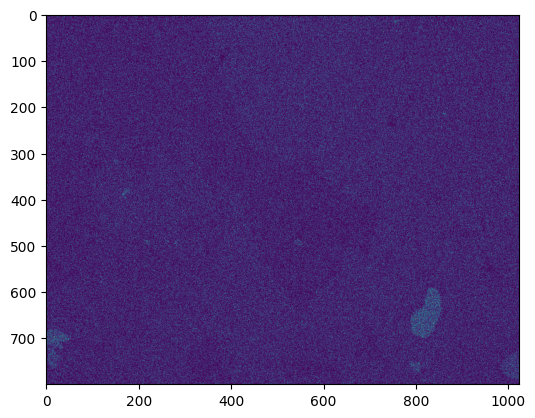

In [12]:
plt.imshow(im)

In [13]:
ds[0]['axes']

[{'size': 800,
  'index_in_array': 0,
  'name': 'y',
  'scale': np.float32(1.5876777),
  'offset': 0,
  'units': 'µm',
  'navigate': True},
 {'size': 1024,
  'index_in_array': 1,
  'name': 'x',
  'scale': np.float32(1.6013774),
  'offset': 0,
  'units': 'µm',
  'navigate': True},
 {'size': 3000,
  'index_in_array': 2,
  'name': 'Energy',
  'scale': np.float64(0.005),
  'offset': np.float32(0.0),
  'units': 'keV',
  'navigate': False}]

In [38]:
chunksize = 500 
n_chunks = int(np.ceil(ds[0]['axes'][2]['size'] / chunksize))
n_chunks

6

In [39]:
maxindex = ds[0]['axes'][2]['size']
channel_sums = np.zeros((maxindex,))

In [40]:
%%time
for ichunk in range(n_chunks):
    channel_start = ichunk * chunksize
    channel_end = channel_start + chunksize 
    if channel_end > maxindex:
        channel_end = maxindex 
    print(f"integrating over channel range ({channel_start}, {channel_end})")
    subsample = np.array(ds[0]['data'][:,:,channel_start: channel_end])
    sumvalues = subsample.sum(axis=0).sum(axis=0)
    channel_sums[channel_start:channel_end] = sumvalues 

integrating over channel range (0, 500)
integrating over channel range (500, 1000)
integrating over channel range (1000, 1500)
integrating over channel range (1500, 2000)
integrating over channel range (2000, 2500)
integrating over channel range (2500, 3000)
CPU times: user 1.7 s, sys: 163 ms, total: 1.86 s
Wall time: 1.86 s


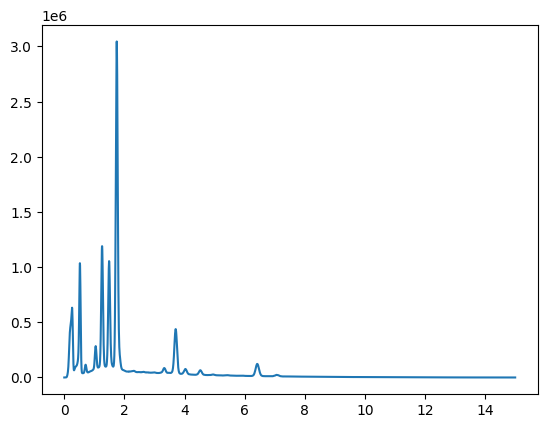

In [41]:
x = np.arange(ds[0]['axes'][2]['size']) * ds[0]['axes'][2]['scale']
plt.plot(x, channel_sums)